# ITC6125 HW1 - Polynomial Curve Fitting and Decision Theory

Prof. Dimitrios Milioris

Learning contents:

1. Linear models
    - Linear function
    - Error function
    - Root meant square error
    - Optimization of Error function
    - Test the model
2. Regularization
    - Error function
    - Optimization
    - Test with regularization
3. Model Selection
    - Cross-validation
4. Bayesian curve fitting
    - Display results

## Description

In this exercise we will apply Linear Models for Polynomial Curve Fitting task.

You have to fill empty functions (with pass in body) to match their purpose.

1. You have to create a code for evaluation of a Linear Model, it's error functions and finding optimal weights with given error functions.
2. You need to add regularization to the optimization procedure.
3. You need to implement Cross-validation model selection technique.
4. You need to implement Bayesian curve fitting, computing phi and S matricies at first, then using them to compute mean and variance.

## Dependencies

In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import  exp

import seaborn as sns; sns.set(); sns.set_palette('bright')

## Generate Data

In [87]:
def target_func(x): return np.sin(2*np.pi*x)

def generate_data(size):
    rng = np.random.RandomState(26052605)
    x_train = rng.uniform(0., 1., size)
    y_train = target_func(x_train) + rng.normal(scale=0.1, size=size)
    x_test = np.linspace(0., 1., 100)
    y_test = target_func(x_test)
    
    return x_train, y_train, x_test, y_test

x_train, y_train, x_test, y_test = generate_data(10)

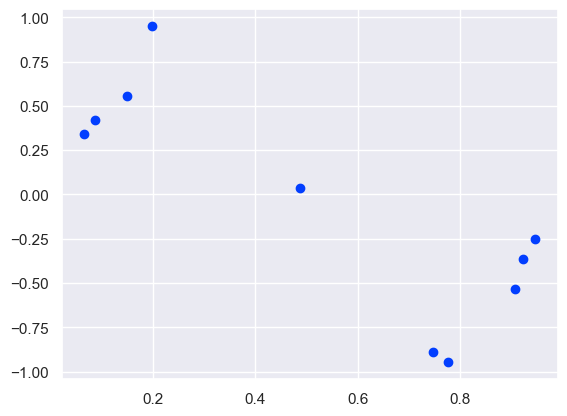

In [88]:
plt.scatter(x_train, y_train)

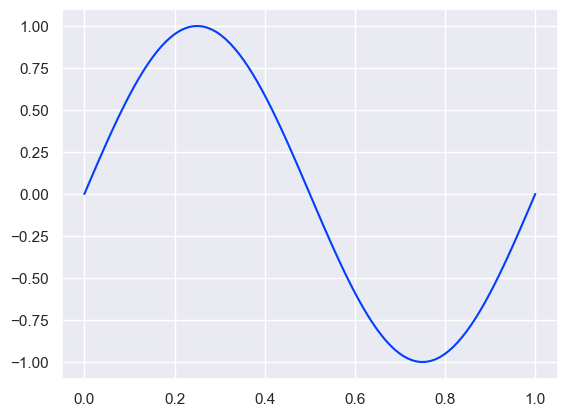

In [89]:
plt.plot(x_test, y_test, '-')

## 1) Linear models

### 1.1) Linear function


Polynomial curve fitting is a process of finding the best-fitting polynomial curve that passes through a set of data points.  From the plots above we can detect that the data points represent some underlying relationship between the two variables. 
The degree of the polynomial determines the complexity of the curve. A higher degree polynomial can fit the data better but may also overfit the data and result in poor generalization. A lower degree polynomial may underfit the data and fail to capture the underlying relationship. The dataset could be of any degree so we will apply weights and will try to find the optimal one.

`linear` takes data point `x` and a list of `weights` as parameters 

The predicted value is the "y_pred" which is a a linear combination of the input feature raised to different powers that also makes it a polynomial regression model. The function multiplies the current weight by the input x and adding it to y_pred.

In [90]:
def linear(x, weights):
    y_pred = 0.0
    # The for loop goes through each weight and corresponding power of "x" and adds it to the "y_pred" 
    for i in range(len(weights)):
        y_pred += weights[i] * x**i
        
    return y_pred

### 1.2) Error function

This error function aims to measure the difference between the predicted output of the model and the actual output (or "target") for a given input.

`err` is a sum-of-squares error function that takes `weights`, `inputs` and `targets` as parameters

In [91]:
def err(weights, inputs, targets):
    # We compute the predictions using linear model
    predictions = []
    for i in range(len(inputs)):
        pred = linear(inputs[i], weights)
        predictions.append(pred)
    
    # Compute the "sum of squares error"
    error = 0.0
    for i in range(len(targets)):
        error += (targets[i] - predictions[i])**2
    
    return error

### 1.3) Root meant square error

Root Mean Square Error (RMSE) measures the average magnitude of the differences between predicted and actual values, taking into account the scale of the data.

In [92]:
def erms(weights, inputs, targets):
    error = 0.0
    # The for loop goes over each input feature and computes the predicted value using the linear function
    for i in range(len(inputs)):
        prediction = linear(inputs[i], weights)
        # Then, it sums up the squared differences between the prediction and the actual target values
        error += (prediction - targets[i])**2
        # Lastly, it divides the sum by the number of inputs and takes the square root to get the root mean square error
    error /= len(inputs)
    error = np.sqrt(error)
    
    return error

### 1.4) Optimization of Error function

Optimization of the error aims to find the set of weights that minimize the error between the predicted values and the actual target values. 
Firstly, the function transforms the input data matrix inputs to include M polynomial features using the numpy power function to raise the input values to the required powers. Then, it concatenates the polynomial features to form the matrix X.
Nextly, it calculates the optimal weights by multiplying the pseudo-inverse of the matrix product of X transpose and X with the transpose of X and the targets.
Finally, the function returns the optimal weights.

`optimial_weights` takes `inputs`, `targets`, and `M` (number of weights) as parameters and returns optimal weights for this data

In [93]:
def optimial_weights(inputs, targets, M):
    # The first step is to create a matrix X of shape (len(inputs), M+1) that will hold the input data and its polynomial
    # features. We start by creating a column of ones (the first column) with np.ones((len(inputs), 1))
    X = np.ones((len(inputs), 1))
    # Secondly, using a for loop, we add the polynomial features to the matrix X
    # We start from 1 because the first column of X is already a column of ones. We use np.power function to 
    # calculate the power of the input data and then reshape it to (len(inputs), 1) using reshape(len(inputs), 1)
    # This reshaped input data is then concatenated with the existing X matrix along the second axis (columns) using np.concatenate(X, ..., axis=1)
    for i in range(1, M+1):
        X = np.concatenate((X, np.power(inputs, i).reshape(len(inputs), 1)), axis=1)
    # Lastly, the optimal weights are calculated using the pseudo-inverse of X. The pseudo-inverse of a matrix A is 
    # a generalization of the matrix inverse for singular or non-square matrices
    # We use np.linalg.pinv function to calculate the pseudo-inverse of np.dot(X.T, X) matrix, which is then multiplied 
    # with X.T and targets to calculate the optimal weights using dot method
    weights = np.dot(np.linalg.pinv(np.dot(X.T, X)), X.T).dot(targets)
    
    return weights
    

### 1.5) Test the model

Following, we test the performance of the polynomial curve fitting model with different values of M, which represents the number of polynomial features used in the model.

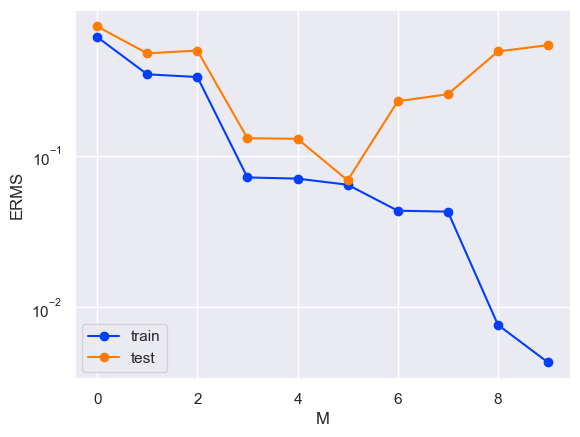

In [94]:
def test_all(start_M, end_M, x_train, y_train, x_test, y_test):
    
    results_train = []
    results_test = []
    all_weights = []
    
    for M in range(start_M, end_M + 1):
        weights = optimial_weights(x_train, y_train, M)
        all_weights.append(weights)
        error_train = erms(weights, x_train, y_train)
        error_test = erms(weights, x_test, y_test)
        results_train.append(error_train)
        results_test.append(error_test)
    return results_train, results_test, all_weights

r_tr, r_tt, all_weights = test_all(0, 9, x_train, y_train, x_test, y_test)

plt.plot(list(range(0, 10)), r_tr, '-o', label='train')
plt.plot(list(range(0, 10)), r_tt, '-o', label='test')
plt.xlabel('M')
plt.ylabel('ERMS')
plt.legend()
plt.yscale('log')

##### Weights table for different `M`

In [95]:
print(pd.DataFrame(all_weights))

          0           1            2             3             4  \
0 -0.067444         NaN          NaN           NaN           NaN   
1  0.674906   -1.403250          NaN           NaN           NaN   
2  0.870601   -2.937208     1.521622           NaN           NaN   
3 -0.348533   11.654727   -33.094539     22.088529           NaN   
4 -0.274931   10.447965   -27.877273     14.161034      3.897826   
5  0.052313    2.957062    24.077616   -126.364847    164.358999   
6  1.343704  -29.263449   282.780650  -1019.109641   1661.058737   
7  1.660034  -39.467052   401.666941  -1667.832240   3460.298194   
8 -2.483586  104.729963 -1467.479792  10142.991177 -36836.544579   
9 -2.096121   87.310108 -1160.390080   7385.517053 -22980.534632   

              5             6             7             8            9  
0           NaN           NaN           NaN           NaN          NaN  
1           NaN           NaN           NaN           NaN          NaN  
2           NaN           NaN   

From the results above, we can detect that when the M takes values that are greater than 5 the model is prone to overfitting (since the variance for the train set is getting lower but in the unseen data is getting bigger which means that the model does not generalize well). Aditionally, when M takes values which are lower than 5 the model is considered too simple and is affected by bias. As a result, the best performance comes when M is equal to 5.

##### Estimated curve for `M=9` (same as the amount of data points) 

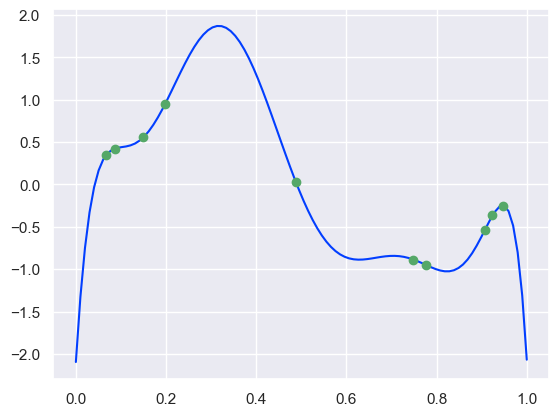

In [96]:
plt.plot(x_test, list(map(lambda x: linear(x, optimial_weights(x_train, y_train, 9)), x_test)), '-')
plt.plot(x_train, y_train, 'og')

For M=9, the train set seems to be expressed by the best fit line but in this case, our model does not generalize well, which means that for the unseen data the performance won't be as good as this. 

## 2) Regularization

### 2.1) Error function

The following function computes the sum-of-squares error with weight regularization:

`err_regularization` takes `weights`, `inputs`, `targets` and `l` (regularization term) and computes sum-of-squares error with weights regularization

The following function computes the sum-of-squares error between the predicted targets and the actual targets, with an additional regularization term to help prevent overfitting. The regularization term is computed using the L2 regularization method, which penalizes large weights. By adding this regularization term to the error, the function encourages the model to learn simpler relationships between the inputs and outputs, which can help it generalize better to new, unseen data.

In [97]:
def err_regularization(weights, inputs, targets, l):
    # Compute the predicted targets using the given weights and inputs
    predictions = np.dot(inputs, weights)
    # Compute the sum-of-squares error between the predicted targets and the actual targets
    error = np.sum((predictions - targets) ** 2)
    # Compute the regularization term using the L2 regularization method
    regularization = l * np.sum(weights ** 2)
    # Add the regularization term to the error and return the result
    
    return error + regularization

`erms_regularization` is a regularization version of a root mean squares error with weight regularization.

In [98]:
def erms_regularization(weights, inputs, targets, l):
    error = 0.0
    for i in range(len(inputs)):
        prediction = linear(inputs[i], weights)
        error += (prediction - targets[i]) ** 2
        # The difference with before is that it adds the regularization term, l * np.sum(weights ** 2), to the error
    regularization = l * np.sum(weights ** 2)
    error += regularization
    error /= len(inputs)
    error = np.sqrt(error)
    
    return error

### 2.2) Optimization

`optimial_weights_regularization` takes `inputs`, `targets`, `M` (number of weights) and `l` (regularization term)  as parameters and returns optimal weights (with regularization) for this data

In [99]:
def optimial_weights_regularization(inputs, targets, M, l):
    # create the matrix of ones (same as what we did before)
    X = np.ones((len(inputs), 1))
    # Again, using a for loop, we add the polynomial features to the matrix X
    for i in range(1, M+1):
        X = np.concatenate((X, np.power(inputs, i).reshape(len(inputs), 1)), axis=1)
     # Compute the optimal weights with the regularization term
    I = np.eye(M+1) # we created an identity matrix with size (M+1)x(M+1). This matrix will be used to compute the regularization term
    I[0,0] = 0 #  Set the element (0,0) of the I matrix to zero in order to avoid regularizing the bias term
    w = np.linalg.inv(X.T @ X + l*I) @ X.T @ targets # we computed the optimal weights using the closed-form solution with regularization
    # The formula used is:(X.T @ X + l*I) @ w = X.T @ targets
    # Lastly, we returned the optimal weights
    
    return w

### 2.3) Test with regularization

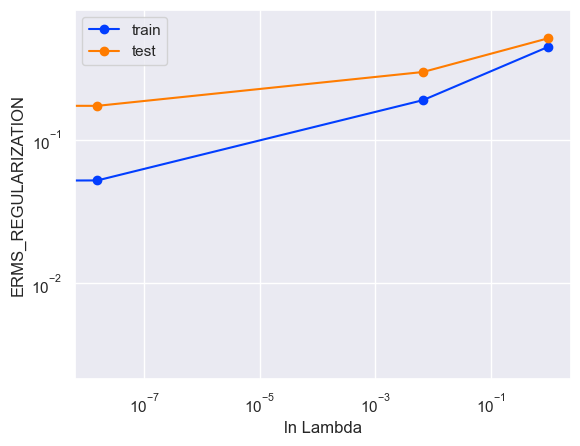

In [100]:
def test_all_regularization(ls, M, x_train, y_train, x_test, y_test):
    
    results_train = []
    results_test = []
    all_weights = []
    
    for l in ls:
        weights = optimial_weights_regularization(x_train, y_train, M, l)
        all_weights.append(weights)
        error_train = erms_regularization(weights, x_train, y_train, l)
        error_test = erms_regularization(weights, x_test, y_test, l)
        results_train.append(error_train)
        results_test.append(error_test)
    return results_train, results_test, all_weights

ls = [0, exp(-18), exp(-5), exp(0)]

r_tr_r, r_tt_r, all_weights_r = test_all_regularization(ls, 9, x_train, y_train, x_test, y_test)

plt.plot(ls, r_tr_r, '-o', label='train')
plt.plot(ls, r_tt_r, '-o', label='test')
plt.xlabel('ln Lambda')
plt.ylabel('ERMS_REGULARIZATION')
plt.legend()
plt.yscale('log')
plt.xscale('log')

##### Weights for `M=9` with regularization terms `0`, `exp(-18)`, `exp(-5)`, `exp(0)`

We can also detect that as the regularization term increases, the magnitudes of the weights decrease. This is because the regularization term penalizes large weights, forcing the model to use smaller weights.

In [101]:
print(pd.DataFrame(np.transpose(all_weights_r)))

               0           1         2         3
0      -1.501258    0.699012  0.506028  0.405072
1      61.672708  -11.795693  0.730062 -0.452350
2    -723.009632  121.043924 -2.413962 -0.373809
3    3560.597777 -335.150377 -1.903234 -0.241404
4   -4147.617457  217.987231 -0.795505 -0.130381
5  -20715.716285  178.622571  0.105324 -0.046679
6   80256.376509  -87.722887  0.717388  0.014429
7 -116169.873408 -148.839232  1.095099  0.058190
8   78490.205457  -12.387873  1.301036  0.088868
9  -20614.033182   78.207442  1.385206  0.109737


In [102]:
def plot_by_lambda(l):
    plt.plot(x_test, y_test, '-m')
    plt.plot(x_test, list(map(lambda x: linear(x, optimial_weights_regularization(x_train, y_train, 9, l)), x_test)), '-')
    plt.plot(x_train, y_train, 'og')

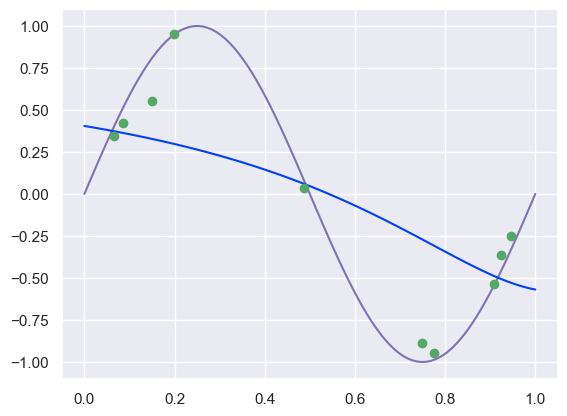

In [103]:
plot_by_lambda(exp(0))

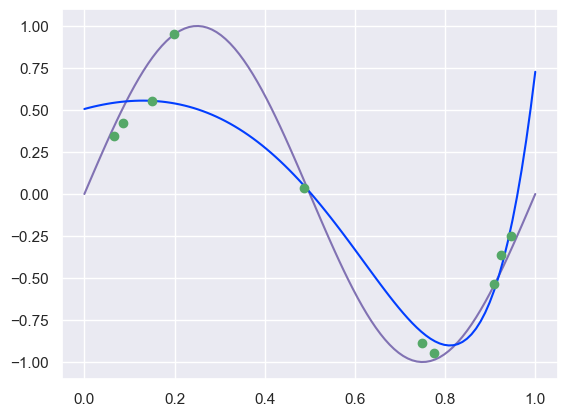

In [104]:
plot_by_lambda(exp(-5))

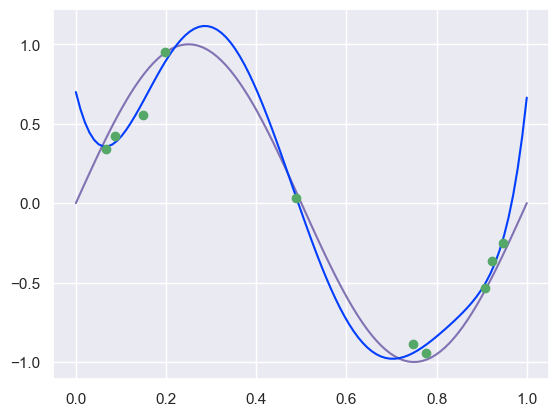

In [105]:
plot_by_lambda(exp(-18))

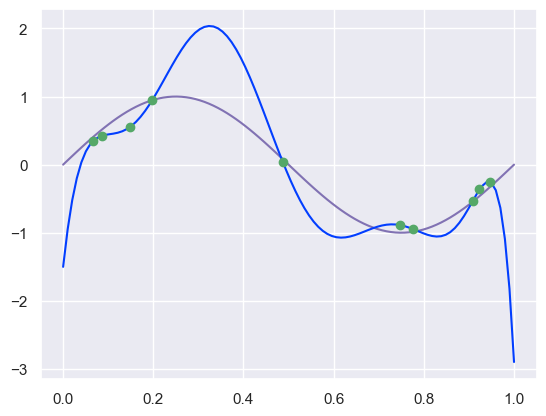

In [106]:
plot_by_lambda(0)

## 3) Model Selection

### 3.1) Cross-validation

`create_cross_validation_sets` takes `S` (number of sets) and data points `x_train`, `y_train` as parameters and returns array of sets in form `[x_sub_train, y_sub_train, x_validation, y_validation]` each

In [107]:
def create_cross_validation_sets(S, x_train, y_train):
    # Compute the number of data points in each subset by dividing the total number of data points by the number of subsets
    N = len(x_train)
    n = N // S
     # Shuffle the data points randomly
    indices = np.random.permutation(N)
     # Split the indices into S subsets
    subsets = [indices[i*n:(i+1)*n] for i in range(S)]
    # For each subset, we select the corresponding data points from the original dataset by deleting the indices of the 
    # subset from the shuffled indices. This creates a subset of training data
    sets = []
    # We select the data points corresponding to the subset indices as validation data
    # We append a list of the training and validation data to a list of subsets
    for i in range(S):
        sub_indices = subsets[i]
        x_sub_train = x_train[np.delete(indices, sub_indices)]
        y_sub_train = y_train[np.delete(indices, sub_indices)]
        x_validation = x_train[sub_indices]
        y_validation = y_train[sub_indices]
        sets.append([x_sub_train, y_sub_train, x_validation, y_validation])
    # Finally, we return the list of subsets for cross-validation
    
    return sets

`best_model` takes `start_M`, `end_M` (low and high limits to search for `M`), `ls` (list of regularization terms) and `sets` (cross-validation sets) and should return `(top_M, top_l, top_result_test)` with `M`, `l` and result for the best model

M = 8 lambda = 0 erms = 0.10248774958660248


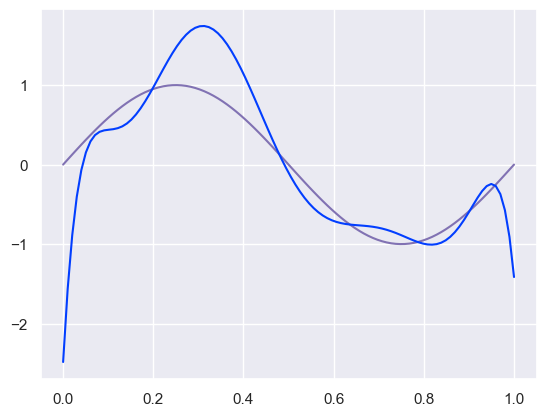

In [108]:
def best_model(start_M, end_M, ls, sets):
    # Firstly, we initilize the " top_result_test " to infinity (because we want to minimize the error and any actual 
    # value will be less than infinity)
    # We initialize top_M and top_l equal to -1 because they will later be assigned to values from the range(start_M, end_M+1)
    # and ls, respectively, so any actual value will be greater than -1.
    top_result_test = float('inf')
    top_M = -1
    top_l = -1
    for M in range(start_M, end_M+1):
        for l in ls:
            total_error_test = 0
            # loop over each subset of the data in sets, where each subset consists of a training set and a validation set 
            # Enumerate is used to iterate through each item of sets and at the same time keep track of the index
            for i, (x_sub_train, y_sub_train, x_validation, y_validation) in enumerate(sets):
                # We compute the optimal weights, RMSE, total_error and average_error by using previous functions
                weights = optimial_weights_regularization(x_sub_train, y_sub_train, M, l)
                error_test = erms_regularization(weights, x_validation, y_validation, l)
                total_error_test += error_test
            average_error_test = total_error_test / len(sets)
            if average_error_test < top_result_test:
                top_result_test = average_error_test
                top_M = M
                top_l = l
    # Return the values of top_M, top_l, and top_result_test
    return top_M, top_l, top_result_test


x_cross_train, y_cross_train, _, _ = generate_data(100) 

M, l, r = best_model(0, 9, [0, exp(-18), exp(-5), exp(0)], create_cross_validation_sets(10, x_cross_train, y_cross_train))
print('M =', M, 'lambda =', l, 'erms =', r)

plt.plot(x_test, y_test, '-m')
plt.plot(x_test, list(map(lambda x: linear(x, optimial_weights_regularization(x_train, y_train, M, l)), x_test)), '-')

## 4) Bayesian curve fitting

`phi` takes `x` (data point) and `M` (number of weights) as arguments and returns a vector of powers of `x` from `0` to `M`

In [109]:
def phi(x, M):
    return np.power(x.reshape(-1, 1), np.arange(M+1))
# This is a 1D array of length M+1, where the first element is x^0 (which is always 1), the second element is x^1, and so on

`S` takes `alpha`, `beta`, `x` (all data points), and `M` as arguments and returns a matrix `S` that is used to compute `mean` and `variance`

In [110]:
def S(alpha, beta, x, M):
    # A matrix Phi is initialized with shape (len(x), M+1) containing all zeros
    Phi = np.zeros((len(x), M + 1))
    # A for loop is used to iterate over each element x[i] in x and populate the corresponding row of Phi with the polynomial features of x[i] 
    # up to the Mth power using the phi function
    for i in range(len(x)):
        Phi[i, :] = phi(x[i], M)
    # The matrix S is calculated by multiplying alpha with the identity matrix of shape (M+1, M+1) 
    # and adding the product of beta and the dot product of Phi with its transpose Phi.T
    
    return alpha * np.eye(M + 1) + beta * np.dot(Phi.T, Phi)

In Bayesian curve fitting, S is used to calculate the mean and covariance of the posterior distribution over the weights

`mean` takes `alpha`, `beta`, `x_star` (new point), `x` (all data points), `t` (target values), and `M` and computes mean for the Gaussian distribution

In [111]:
def mean(alpha, beta, x_star, x, t, M):
    # Compute the vector of powers of x_star
    phi_star = phi(x_star, M)

    # Compute the matrix S
## S is a (M+1) x (M+1) matrix that depends on the hyperparameters alpha, beta and the data points x and the polynomial order M
    S_matrix = S(alpha, beta, x, M)

    # Compute the vector m using the formula for the mean in Bayesian curve fitting
    m = beta * np.dot(phi_star, np.dot(S_matrix, np.sum(phi(x, M) * t[:, None], axis=0)))
    # np.sum(phi(x, M) * t[:, None], axis=0: computes the dot product of the phi matrix, which has one row for each data point and one column for each power of x and the target values t
    m = np.squeeze(m) # This converts the mean m to a 1-dimensional numpy array
    # We return the mean
    
    return m

`variance` takes `alpha`, `beta`, `x_star` (new point), `x` (all data points), `t` (target values), and `M` and computes mean for the Gaussian variance

In [112]:
def variance(alpha, beta, x_star, x, t, M):
    phi_x_star = phi(x_star, M) # here we generate a matrix with powers of x_star from 0 to M
    # The inverse of the matrix S is computed using:
    S_inv = np.linalg.inv(S(alpha, beta, x, M)) # where S is generated by calling the S function with alpha, beta, x, and M
    # The variance of the predictive distribution for Bayesian curve fitting is computed as following:
    var = 1/beta + np.dot(phi_x_star, np.dot(S_inv, phi_x_star.T))
    var = np.squeeze(var) # This converts the variance to a 1-dimensional numpy array
    
    return var

### 4.1) Display results

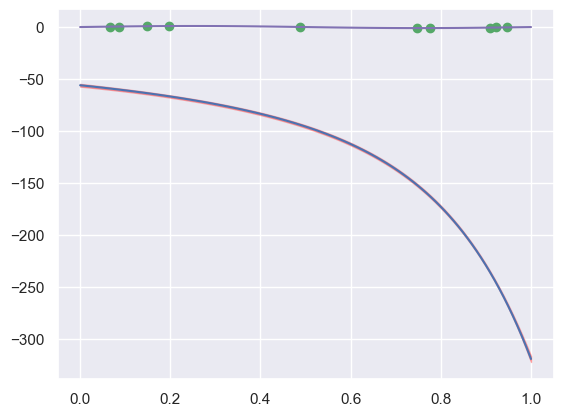

In [113]:
alpha = 0.05
beta = 1.1
M = 9

means = np.array(list(map(lambda x: mean(alpha, beta, x, x_train, y_train, M), x_test)))
variances = np.array(list(map(lambda x: variance(alpha, beta, x, x_train, y_train, M), x_test)))

plt.plot(x_train, y_train, 'og')
plt.plot(x_test, y_test, '-m')
plt.plot(x_test, means, '-b')
# fix alpha to numeric
plt.fill_between(x_test, means + variances, means - variances, color='red', alpha=0.3)